In [ ]:
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import pandas_profiling
import numpy as np
import re
import requests
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
import types

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the task1_train data
train_df = pd.read_csv("drive/My Drive/task3_train.csv", low_memory=False, header=0)
train_df.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,2369,0.0,2013-01-30,Tcrs,1373,Community,30.770440,-3.535324,Milembi,0,Lake Tanganyika,Bwilinde,Kigoma,16,1,Kibondo,Misezero,360,True,GeoData Consultants Ltd,VWC,NaN,False,2000,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring,others
1,43734,0.0,2013-04-03,Adra,1120,Adra/ Community,36.979469,-3.347928,Justin,0,Pangani,Olkononoi,Arusha,2,7,Meru,Kikatiti,120,True,GeoData Consultants Ltd,VWC,Maambreni gravity water supply,True,2002,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,others
2,17667,250.0,2013-02-07,Norad,1409,NORAD,29.936235,-4.422470,Kwa Ntilio,0,Lake Tanganyika,Rusange,Kigoma,16,2,Kasulu,Janda,370,True,GeoData Consultants Ltd,Water authority,Nyafisi,True,1991,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional needs repair
3,56384,0.0,2013-01-27,Fw,306,FW,38.979287,-10.826676,Bomba Chumvi,0,Ruvuma / Southern Coast,Mnazimmoja A,Mtwara,90,33,Masasi,Nanjota,1,True,GeoData Consultants Ltd,VWC,NaN,True,1980,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,others
4,45781,0.0,2011-07-12,Hesawa,0,HESAWA,31.732534,-2.436331,Mwinyi,0,Lake Victoria,Nyisanzi Store,Kagera,18,8,Chato,Kigongo,0,True,GeoData Consultants Ltd,WUA,NaN,True,0,nira/tanira,nira/tanira,handpump,wua,user-group,pay monthly,monthly,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,others


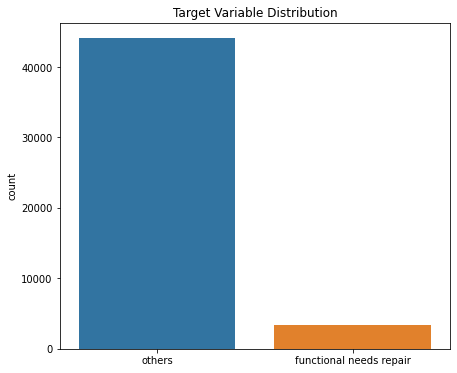

In [ ]:
#@title
#Check distribution of targets
plt.figure(figsize=(7, 6))
sns.countplot(train_df.iloc[:,-1].values)
plt.title('Target Variable Distribution');

In [ ]:
train_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2903
gps_height                   0
installer                 2918
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 302
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2644
recorded_by                  0
scheme_management         3100
scheme_name              22454
permit                    2464
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
y = train_df["status_group"]
X = train_df.drop("status_group", axis=1, inplace=True)

In [ ]:
from collections import Counter
#from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

ValueError: ignored